<a href="https://colab.research.google.com/github/Faizaa01/Machine_Learning_Fundamentals/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

In [3]:
california = fetch_california_housing(as_frame=True)

df = california.frame.copy()
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
tar_col = 'MedHouseVal'
fea_cols = ['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
X = df[fea_cols]
y = df[tar_col]
print(X.shape, y.shape)
X.head()

(20640, 6) (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [10]:
corr_matrix = df[fea_cols + [tar_col]].corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


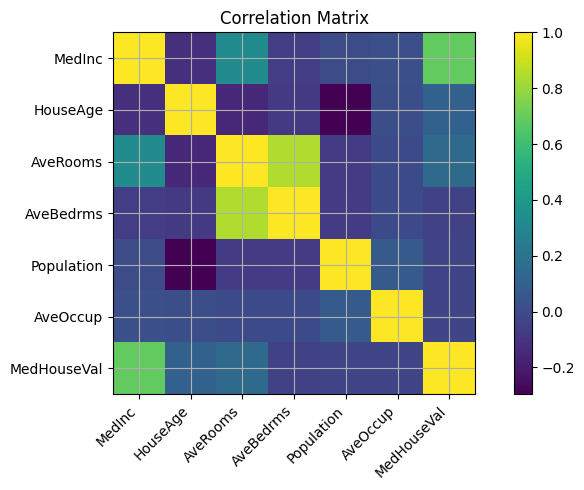

In [14]:
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (16512, 6)
Test set size: (4128, 6)


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print('Intercept', lin_reg.intercept_)
print('Coefficients: ')
for feature_name, coef in zip(fea_cols, lin_reg.coef_):
    print(f'{feature_name}: {coef}')

Intercept -0.5528727644615126
Coefficients: 
MedInc: 0.5461607791074247
HouseAge: 0.016787909062568093
AveRooms: -0.2239199440047988
AveBedrms: 1.1154926114808392
Population: 2.3167197368202663e-05
AveOccup: -0.004618231345406933


In [21]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)
print('Some sample predictions on test set: ')
print('Predicted: ', y_test_pred[:5])
print('Actual: ', y_test[:5].values)

Some sample predictions on test set: 
Predicted:  [1.00100537 1.56005635 2.67713262 2.64763331 1.98229968]
Actual:  [0.477   0.458   5.00001 2.186   2.78   ]


In [25]:
def regression_metrics(y_true, y_pred, label='Model'):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_true)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f'--- {label} ---')
    print(f'{label} MAE: {mae:.2f}')
    print(f'{label} MSE: {mse:.2f}')
    print(f'{label} RMSE: {rmse:.2f}')
    print(f'{label} R2: {r2:.2f}')

regression_metrics(y_train, y_train_pred, 'Train')
regression_metrics(y_test, y_test_pred, 'Test')

--- Train ---
Train MAE: 0.57
Train MSE: 0.00
Train RMSE: 0.00
Train R2: 0.55
--- Test ---
Test MAE: 0.58
Test MSE: 0.00
Test RMSE: 0.00
Test R2: 0.51


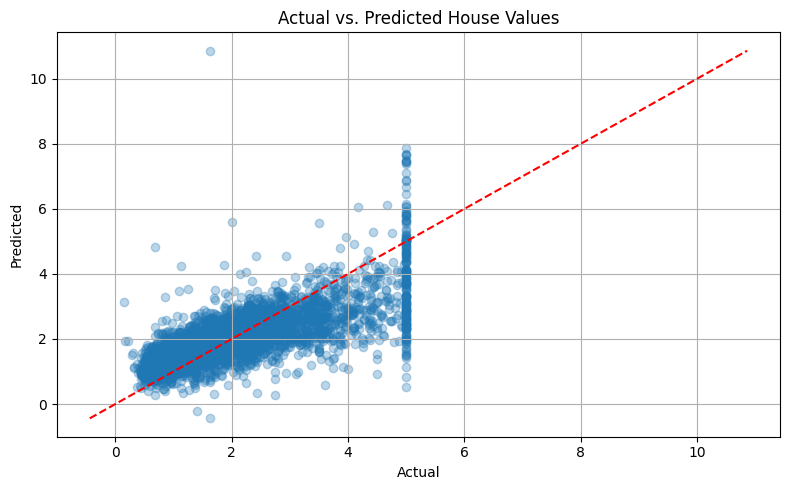

In [26]:
plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Values')

min_val= min(y_test.min(),y_test_pred.min())
max_val=max(y_test.max(),y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.tight_layout()
plt.show()

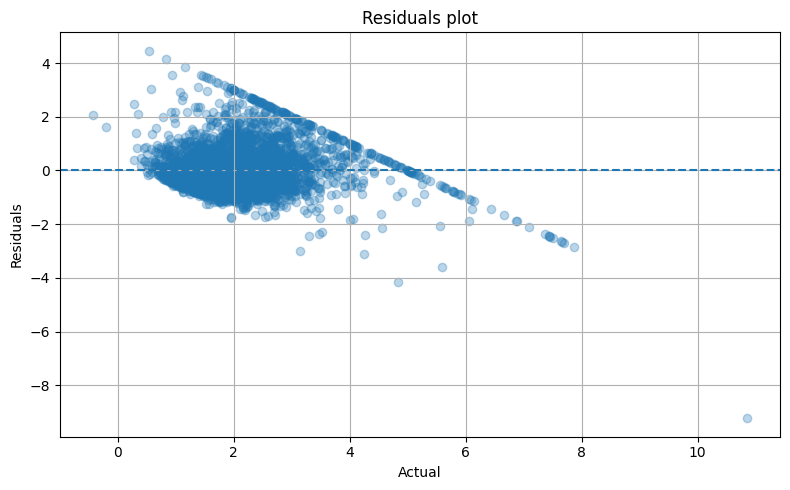

In [28]:
residuals = y_test - y_test_pred
plt.figure()
plt.scatter(y_test_pred, residuals, alpha=0.3)
plt.axhline(0, linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals plot')
plt.tight_layout()
plt.show()

In [32]:
X_single = df[['MedInc']]
y_single = df[tar_col]
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

lin_reg_single = LinearRegression()
lin_reg_single.fit(X_train_single, y_train_single)
y_single_test_pred = lin_reg_single.predict(X_test_single)

regression_metrics(y_test_single, y_single_test_pred, 'Single Feature')

--- Single Feature ---
Single Feature MAE: 0.63
Single Feature MSE: 0.00
Single Feature RMSE: 0.00
Single Feature R2: 0.46


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


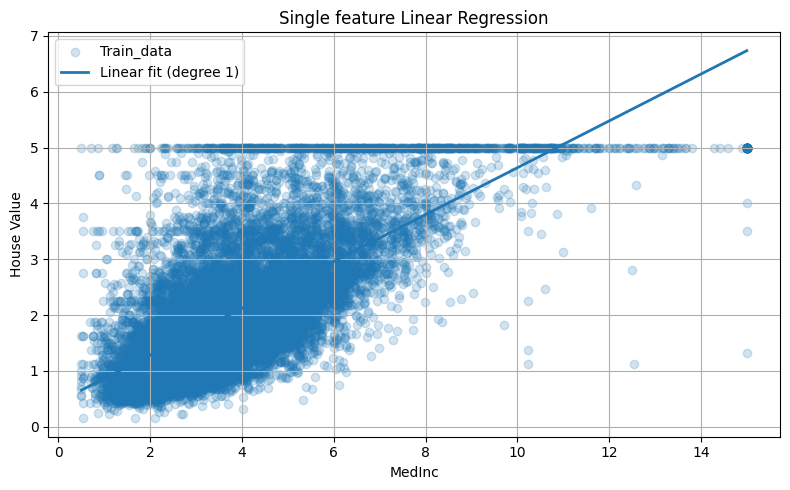

In [35]:
X_plot = np.linspace(X_single['MedInc'].min(), X_single['MedInc'].max(), 200).reshape(-1, 1)
y_plot_lin = lin_reg_single.predict(X_plot)

plt.figure()
plt.scatter(X_train_single['MedInc'], y_train_single, alpha=0.2, label='Train_data')
plt.plot(X_plot, y_plot_lin, linewidth=2, label='Linear fit (degree 1)')
plt.xlabel('MedInc')
plt.ylabel('House Value')
plt.title('Single feature Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
degrees = [1,2,3,5]
results = []
for deg in degrees:
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg)),
      ('lin_reg', LinearRegression())
  ])
  model.fit(X_train_single, y_train_single)

  y_train_pred_deg = model.predict(X_train_single)
  y_test_pred_deg = model.predict(X_test_single)

  mae = mean_absolute_error(y_train_single, y_train_pred_deg)
  rmse = np.sqrt(mean_squared_error(y_train_single, y_train_pred_deg))
  r2 = r2_score(y_train_single, y_train_pred_deg)

  mae_test = mean_absolute_error(y_test_single, y_test_pred_deg)
  rmse_test = np.sqrt(mean_squared_error(y_test_single, y_test_pred_deg))
  r2_test = r2_score(y_test_single, y_test_pred_deg)

  results.append({
      'degree': deg,
      'mae': mae,
      'rmse': rmse,
      'r2': r2,
      'mae_test': mae_test,
      'rmse_test': rmse_test,
      'r2_test': r2_test
  })
results_df = pd.DataFrame(results)
results_df

,degree,mae,rmse,r2,mae_test,rmse_test,r2_test
0,1,0.624951,0.836149,0.476993,0.629909,0.842090,0.458859
1,2,0.624049,0.832459,0.481598,0.628292,0.838614,0.463318
2,3,0.615010,0.825033,0.490806,0.621896,0.835641,0.467116
3,5,0.614411,0.824844,0.491039,0.621369,0.835892,0.466796


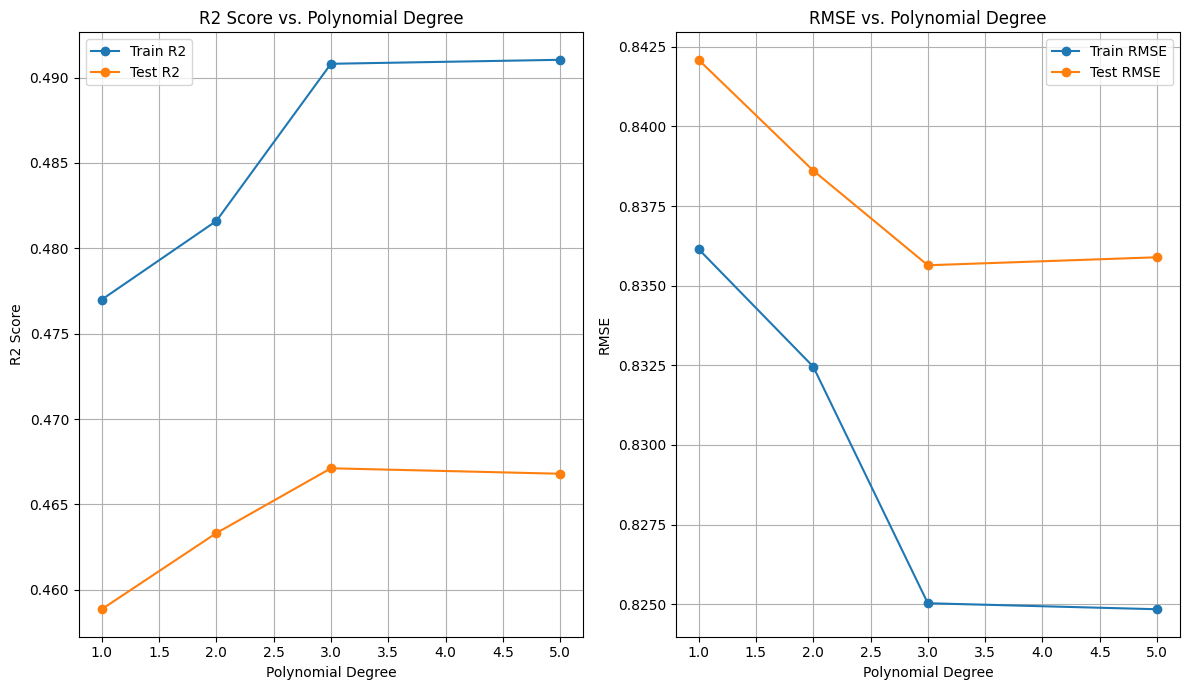

In [40]:
fig, axes = plt.subplots(1,2, figsize=(12,7))

axes[0].plot(results_df['degree'], results_df['r2'], marker='o', label='Train R2')
axes[0].plot(results_df['degree'], results_df['r2_test'], marker='o', label='Test R2')
axes[0].set_title('R2 Score vs. Polynomial Degree')
axes[0].set_xlabel('Polynomial Degree')
axes[0].set_ylabel('R2 Score')
axes[0].legend()

axes[1].plot(results_df['degree'], results_df['rmse'], marker='o', label='Train RMSE')
axes[1].plot(results_df['degree'], results_df['rmse_test'], marker='o', label='Test RMSE')
axes[1].set_title('RMSE vs. Polynomial Degree')
axes[1].set_xlabel('Polynomial Degree')
axes[1].set_ylabel('RMSE')
axes[1].legend()

plt.tight_layout()
plt.show()